In [16]:
# ANALISIS EXPLORATORIO EDA - AGRICULTURAL
from opcode import cmp_op

import pandas
from matplotlib import pyplot as plt

datasetOriginal = pandas.read_csv('C:\\Users\\macam\\OneDrive\\Escritorio\\UPTC\\ESPECIALIZACIÓN\\4. MODELOS ANALITICOS\\agricultural.csv')

print("DATASET AGRICULTURAL")
datasetOriginal.head()

DATASET AGRICULTURAL


,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [17]:
# 1. Verificación de consistencia en los datos
print("ANALISIS COLUMNAS DATASET")
datasetOriginal.info()
# El dataset cuenta con 361 registros y 25 columnas, que combinan datos numéricos y categóricos. Se observa que varias columnas presentan valores faltantes (especialmente las relacionadas con precios y porcentajes de cambio), y algunas están registradas como tipo object en lugar de numérico, lo que sugiere la necesidad de limpiar y convertir los datos para garantizar consistencia y permitir análisis precisos.

ANALISIS COLUMNAS DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-

In [18]:
# Análisis exploratorio de datos numéricos
print("ANALISIS EXPLORATORIO DATOS NUMERICOS")
datasetOriginal.describe()
# Se obtienen estadísticas descriptivas de las variables numéricas para analizar su rango, dispersión y valores representativos (mínimo, máximo, media y cuartiles).

ANALISIS EXPLORATORIO DATOS NUMERICOS


,Cotton Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
count,361.000000,361.000000,327.000000,327.000000,361.000000,361.000000,327.000000,327.000000,360.000000
mean,1.640000,251.034072,707.950367,78.566667,508.216122,1.656427,164.527462,291.061713,696.670889
std,0.513319,65.628406,144.563241,13.690623,89.274718,1.017086,25.596308,34.113959,161.156936
min,0.820000,133.280000,413.370000,28.590000,312.360000,0.490000,119.350000,183.610000,384.000000
25%,1.290000,197.960000,573.470000,69.495000,442.540000,0.860000,145.970000,277.590000,549.777500
50%,1.600000,253.010000,728.710000,77.250000,505.040000,1.440000,160.370000,294.960000,693.580000
75%,1.850000,282.970000,831.635000,86.000000,570.790000,2.060000,180.210000,310.865000,875.000000
max,5.060000,520.810000,973.600000,114.630000,751.810000,6.260000,259.970000,372.600000,966.490000


In [19]:
# Análisis exploratorio de variables categóricas
print("ANALISIS EXPLORATORIO VARIABLES CATEGORICAS¨")

# Valores únicos de cada columna del dataset
datasetOriginal.apply(pandas.unique)

# Se identifican los valores únicos de cada variable.
# 'Month' presenta valores mensuales de 1990, lo que indica una serie temporal.
# Las demás columnas contienen precios y variaciones porcentuales por producto.
# Los símbolos como '-' o '%' reflejan valores no numéricos que requieren limpieza o conversión.

ANALISIS EXPLORATORIO VARIABLES CATEGORICAS¨


Month                           [Apr-90, May-90, Jun-90, Jul-90, Aug-90, Sep-9...
Coarse wool Price               [482.34, 447.26, 440.99, 418.44, 412.18, 394.6...
Coarse wool price % Change      [-, -7.27%, -1.40%, -5.11%, 0.00%, -1.50%, -4....
Copra Price                     [236, 234, 216, 205, 198, 196, 237, 233, 226, ...
Copra price % Change            [-, -0.85%, -7.69%, -5.09%, -3.41%, -1.01%, 1....
Cotton Price                    [1.83, 1.89, 1.99, 2.01, 1.79, 1.82, 1.85, 1.8...
Cotton price % Change           [-, 3.28%, 5.29%, 1.01%, -10.95%, 0.00%, 1.68%...
Fine wool Price                 [1,071.63, 1,057.18, 898.24, 895.83, 951.22, 9...
Fine wool price % Change        [-, -1.35%, -15.03%, -0.27%, 6.18%, -1.52%, -3...
Hard log Price                  [161.2, 172.86, 181.67, 187.96, 186.13, 185.33...
Hard log price % Change         [-, 7.23%, 5.10%, 3.46%, -0.97%, -0.43%, 2.39%...
Hard sawnwood Price             [549.91, 491.88, 495.39, 485.86, 487.52, 487.7...
Hard sawnwood pr

INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES NUMERICA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cotton Price         361 non-null    float64
 1   Hard log Price       361 non-null    float64
 2   Hard sawnwood Price  327 non-null    float64
 3   Hide Price           327 non-null    float64
 4   Plywood Price        361 non-null    float64
 5   Rubber Price         361 non-null    float64
 6   Softlog Price        327 non-null    float64
 7   Soft sawnwood Price  327 non-null    float64
 8   Wood pulp Price      360 non-null    float64
dtypes: float64(9)
memory usage: 25.5 KB


<Figure size 1500x1000 with 0 Axes>

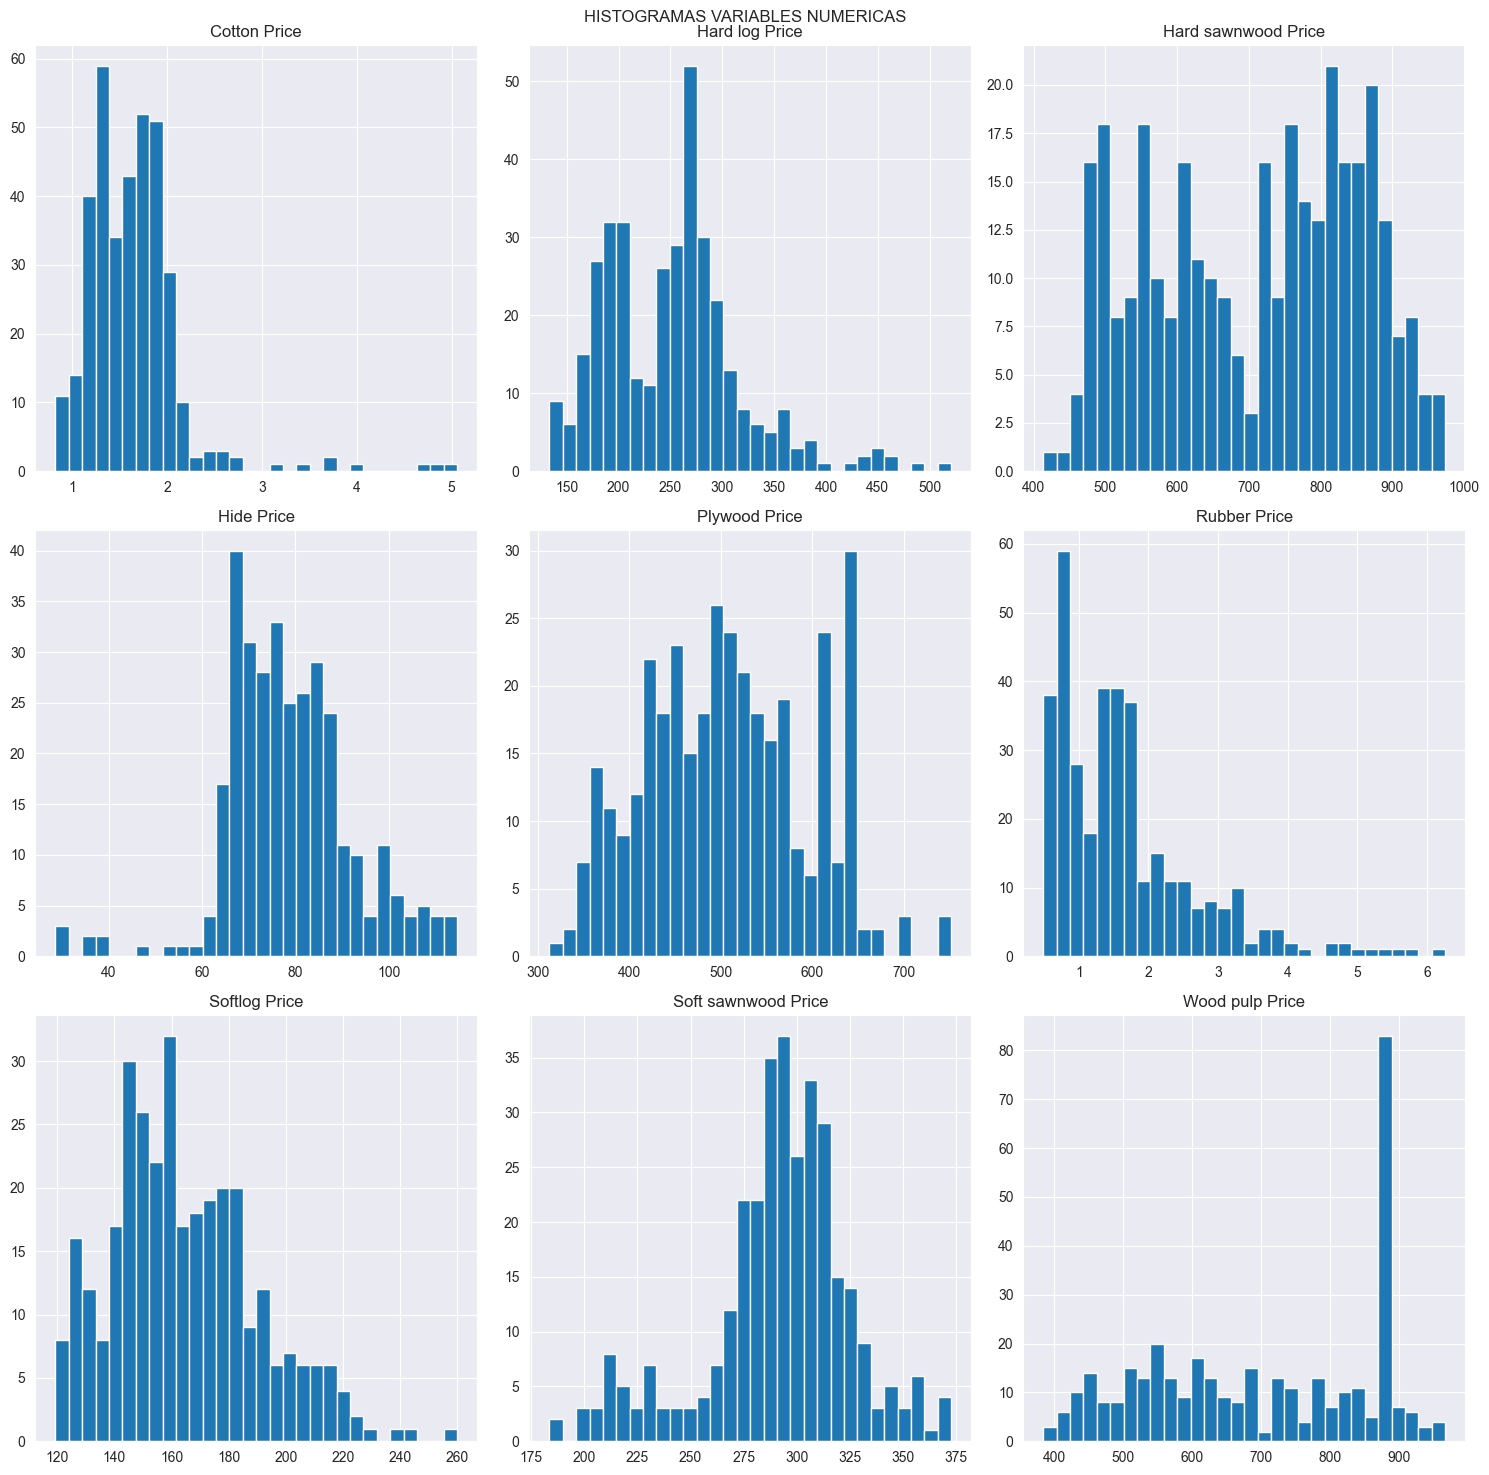

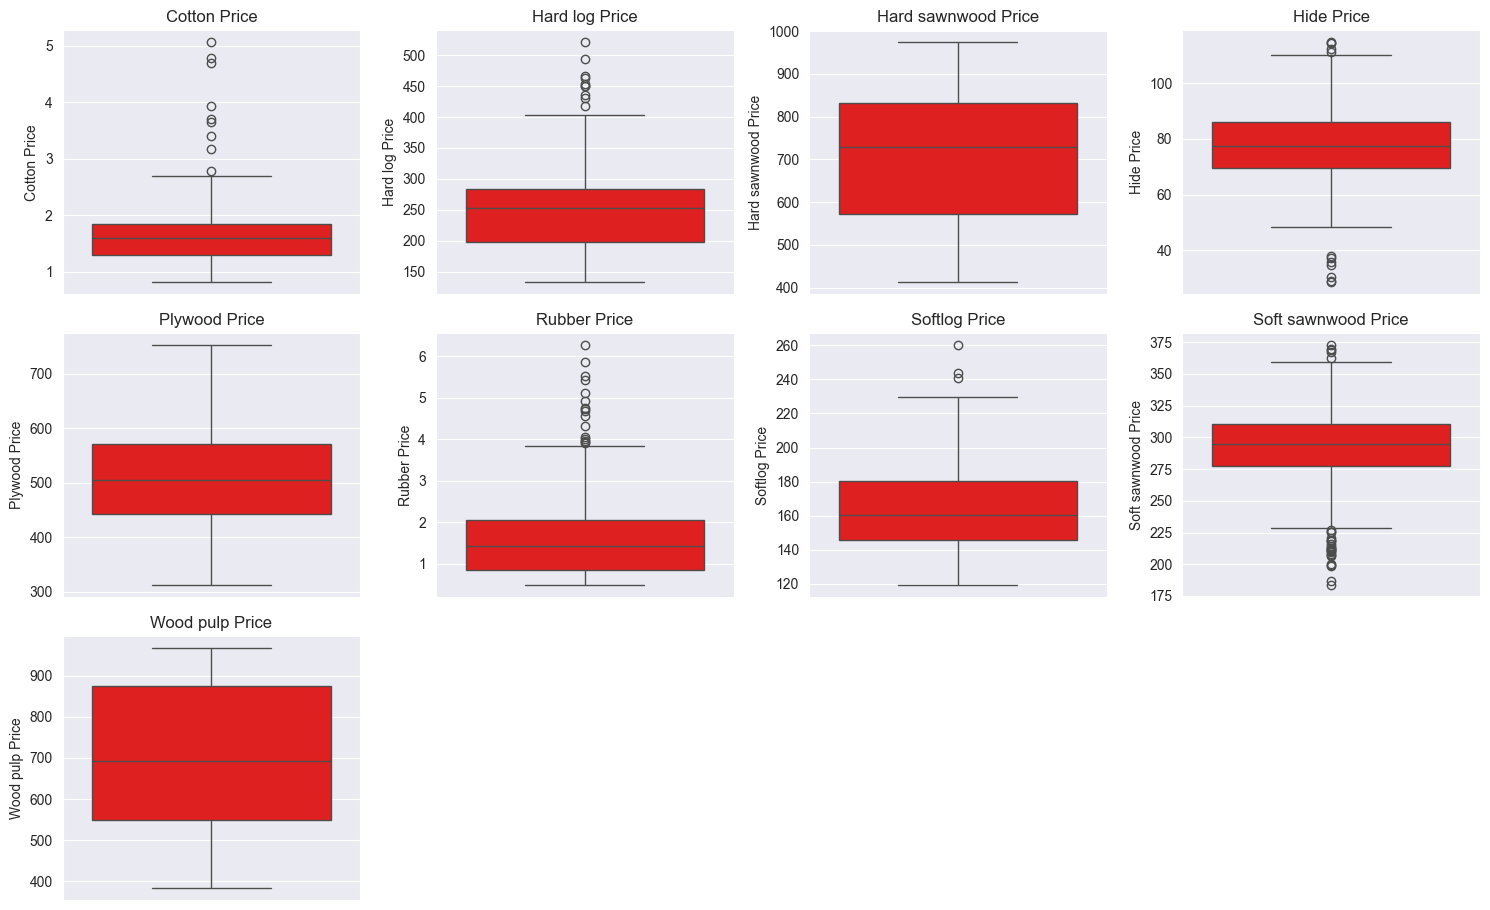

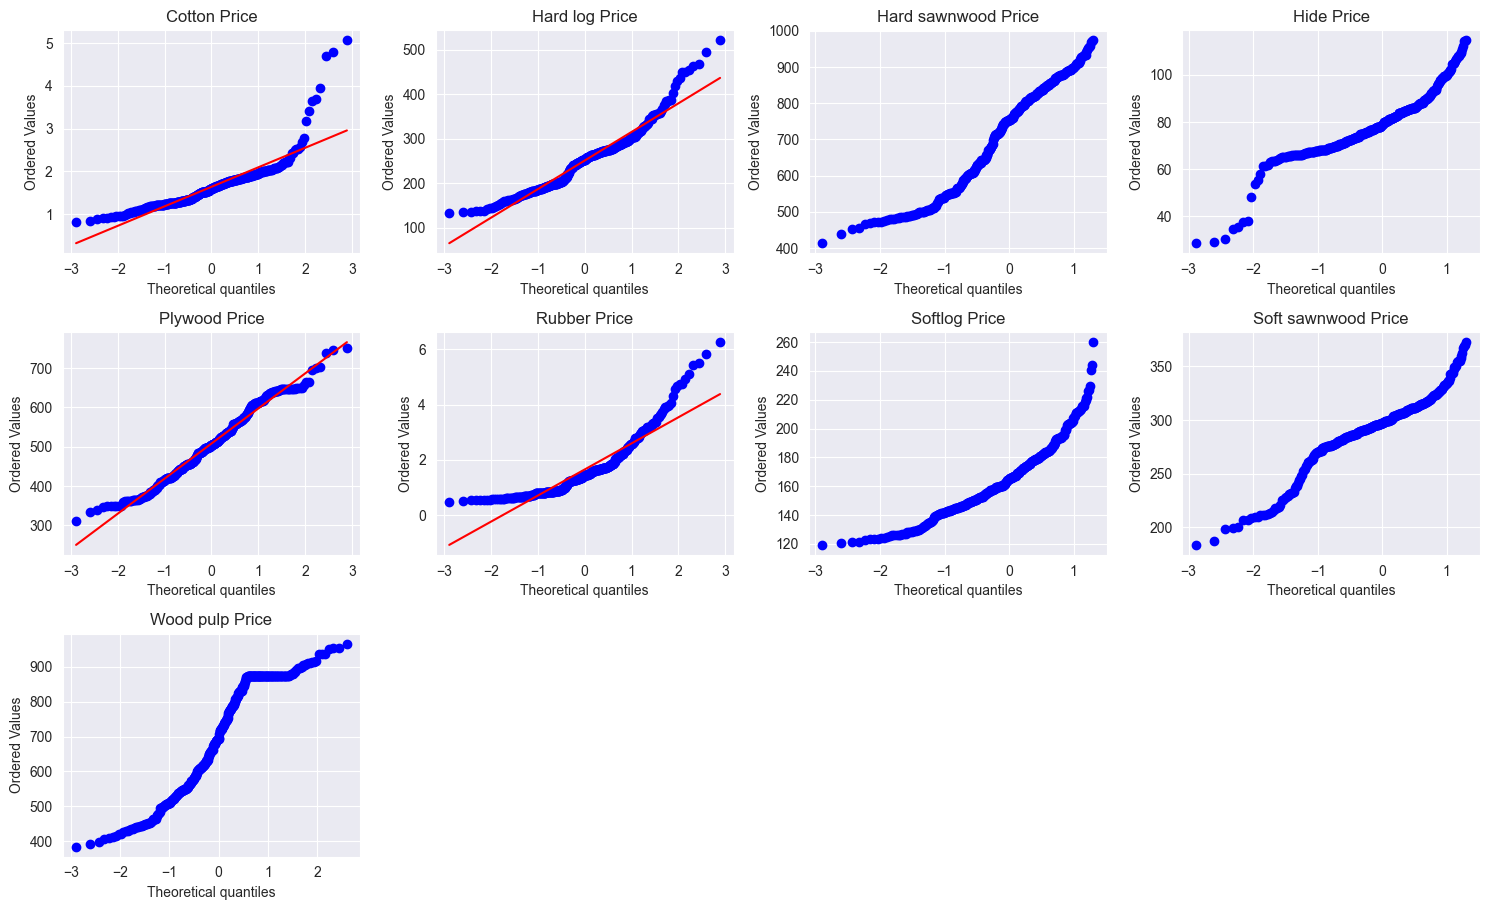

In [20]:
# Interpretación de distribuciones de las variables numéricas
print("INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES NUMERICA")
import numpy
import matplotlib.pyplot as pyplot
import seaborn as sns
import math
import scipy.stats as stats

# Histogramas
datasetOriginalNumberColumns = datasetOriginal.select_dtypes(include=[numpy.number])
datasetOriginalNumberColumns.info()

pyplot.figure(figsize=(15,10))
datasetOriginalNumberColumns.hist(bins = 30, figsize = (15,15))
pyplot.suptitle("HISTOGRAMAS VARIABLES NUMERICAS")
pyplot.tight_layout()
pyplot.show()

# Diagrama de bigotes
numCols = len(datasetOriginalNumberColumns.columns)
cols = 4
rows  = math.ceil(numCols / cols)
pyplot.figure(figsize=(15,10))

for i, column in enumerate(datasetOriginalNumberColumns, 1):
    pyplot.subplot(rows, cols, i)
    sns.boxplot(data = datasetOriginalNumberColumns[column], color = 'red')
    pyplot.title(column)

pyplot.tight_layout(rect=[0, 0.03, 1, 0.95])
pyplot.show()

# QQ Plots
numCols = len(datasetOriginalNumberColumns.columns)
cols = 4
rows  = math.ceil(numCols / cols)
pyplot.figure(figsize=(15,10))

for i, column in enumerate(datasetOriginalNumberColumns, 1):
    pyplot.subplot(rows, cols, i)
    stats.probplot(datasetOriginalNumberColumns[column], plot=pyplot, dist="norm")
    pyplot.title(column)

pyplot.tight_layout(rect=[0, 0.03, 1, 0.95])
pyplot.show()

# Se analizan las distribuciones de las variables numéricas mediante histogramas, diagramas de caja (boxplots) y gráficos QQ.
# Los histogramas permiten observar la forma general de la distribución (simétrica o sesgada).
# Los boxplots facilitan la detección de valores atípicos.
# Los QQ plots comparan la distribución de los datos con una normal teórica, ayudando a evaluar si las variables siguen una distribución normal.

In [21]:
# Interpretación de las distribuciones de las variables categoricas
print("INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS")

datasetOriginal.apply(pandas.unique)

# Se observan las categorías y valores únicos de cada variable.
# La columna 'Month' muestra una secuencia temporal desde 1990,
# lo que indica una serie cronológica mensual.
# Las variables de precios y cambios porcentuales contienen valores numéricos y símbolos como “%” o “-”,
# lo que sugiere que necesitan limpieza o conversión antes del análisis estadístico.
# Algunas columnas combinan texto y números (por ejemplo “1,071.63” o “-1.35%”),
# lo cual confirma que su tipo de dato actual es 'object' y deben transformarse a valores numéricos.

INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS


Month                           [Apr-90, May-90, Jun-90, Jul-90, Aug-90, Sep-9...
Coarse wool Price               [482.34, 447.26, 440.99, 418.44, 412.18, 394.6...
Coarse wool price % Change      [-, -7.27%, -1.40%, -5.11%, 0.00%, -1.50%, -4....
Copra Price                     [236, 234, 216, 205, 198, 196, 237, 233, 226, ...
Copra price % Change            [-, -0.85%, -7.69%, -5.09%, -3.41%, -1.01%, 1....
Cotton Price                    [1.83, 1.89, 1.99, 2.01, 1.79, 1.82, 1.85, 1.8...
Cotton price % Change           [-, 3.28%, 5.29%, 1.01%, -10.95%, 0.00%, 1.68%...
Fine wool Price                 [1,071.63, 1,057.18, 898.24, 895.83, 951.22, 9...
Fine wool price % Change        [-, -1.35%, -15.03%, -0.27%, 6.18%, -1.52%, -3...
Hard log Price                  [161.2, 172.86, 181.67, 187.96, 186.13, 185.33...
Hard log price % Change         [-, 7.23%, 5.10%, 3.46%, -0.97%, -0.43%, 2.39%...
Hard sawnwood Price             [549.91, 491.88, 495.39, 485.86, 487.52, 487.7...
Hard sawnwood pr

In [22]:
# 2. Revisión de datos faltantes
#       a. Datos nulos
datasetOriginal.isnull().sum()

# El análisis evidencia valores faltantes en múltiples columnas numéricas, especialmente en precios y porcentajes de cambio (por ejemplo: Fine wool, Hide, Softlog, etc.). Esto indica que en ciertos meses no se registraron precios o variaciones.
# Las variables sin nulos (como Cotton o Rubber) tienen registros completos y consistentes.

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [23]:
# Revisión de datos faltantes por porcentaje %
print("Identificacion de valores nulos por porcentaje")
totalRows = len(datasetOriginal)
missingPercentage = datasetOriginal.isnull().sum() / totalRows * 100
print(missingPercentage)

Identificacion de valores nulos por porcentaje
Month                           0.000000
Coarse wool Price               9.418283
Coarse wool price % Change      9.418283
Copra Price                     6.094183
Copra price % Change            6.094183
Cotton Price                    0.000000
Cotton price % Change           0.000000
Fine wool Price                 9.418283
Fine wool price % Change        9.418283
Hard log Price                  0.000000
Hard log price % Change         0.000000
Hard sawnwood Price             9.418283
Hard sawnwood price % Change    9.418283
Hide Price                      9.418283
Hide price % change             9.418283
Plywood Price                   0.000000
Plywood price % Change          0.000000
Rubber Price                    0.000000
Rubber price % Change           0.000000
Softlog Price                   9.418283
Softlog price % Change          9.418283
Soft sawnwood Price             9.418283
Soft sawnwood price % Change    9.418283
Wood pulp 

Revision grafica valores nulos


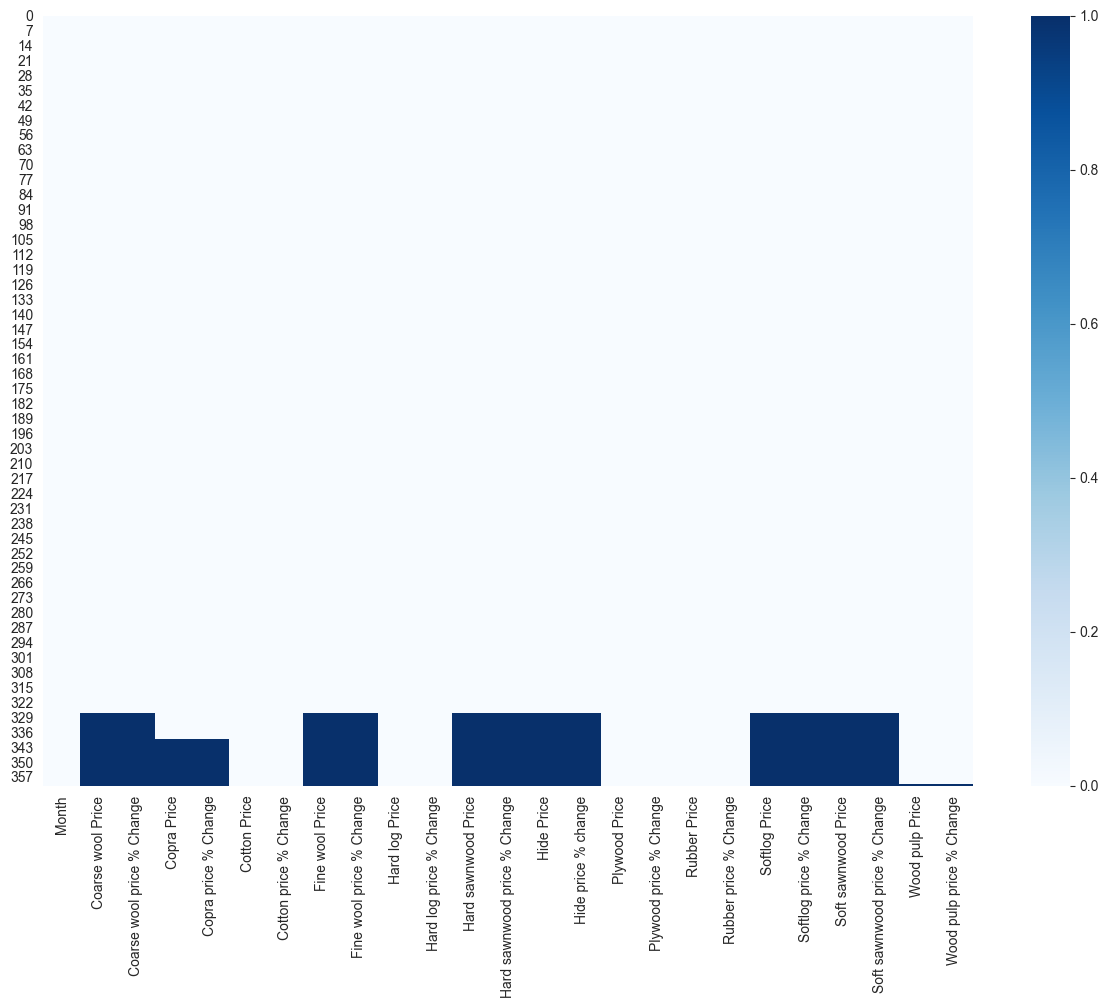

In [24]:
# Revisión de datos faltantes por gráfico
print("Revision grafica valores nulos")
pyplot.figure(figsize=(15,10))
sns.heatmap(datasetOriginal.isnull(), annot=False, cmap='Blues')
pyplot.show()

# El mapa de calor confirma la presencia de valores nulos en varias columnas, principalmente en las series relacionadas con "wool", "hide", "softlog" y "sawnwood". Esto indica ausencia de registros en algunos periodos, mientras que el resto de variables mantienen datos completos.

In [25]:
# Revision datos faltantes
#   b. Manejo de datos faltantes

datasetOriginalClean = datasetOriginal.copy()
datasetOriginalClean.info()

# Se crea una copia del dataset original para limpiar los datos sin modificar el original.
# Al revisar la información del nuevo dataset, se observa que varias columnas presentan valores faltantes, especialmente en Coarse wool Price, Fine wool Price, Hard sawnwood Price, Hide Price, Softlog Price, Soft sawnwood Price y Wood pulp Price, junto con sus respectivas variaciones porcentuales.
# Además, varias columnas con tipo 'object' contienen valores numéricos almacenados como texto.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [26]:
# Eliminar filas que contengan valores nulos o faltantes
datasetOriginalClean = datasetOriginal.dropna()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 0 to 326
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         327 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   327 non-null    object 
 4   Copra price % Change          327 non-null    object 
 5   Cotton Price                  327 non-null    float64
 6   Cotton price % Change         327 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                327 non-null    float64
 10  Hard log price % Change       327 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide Price

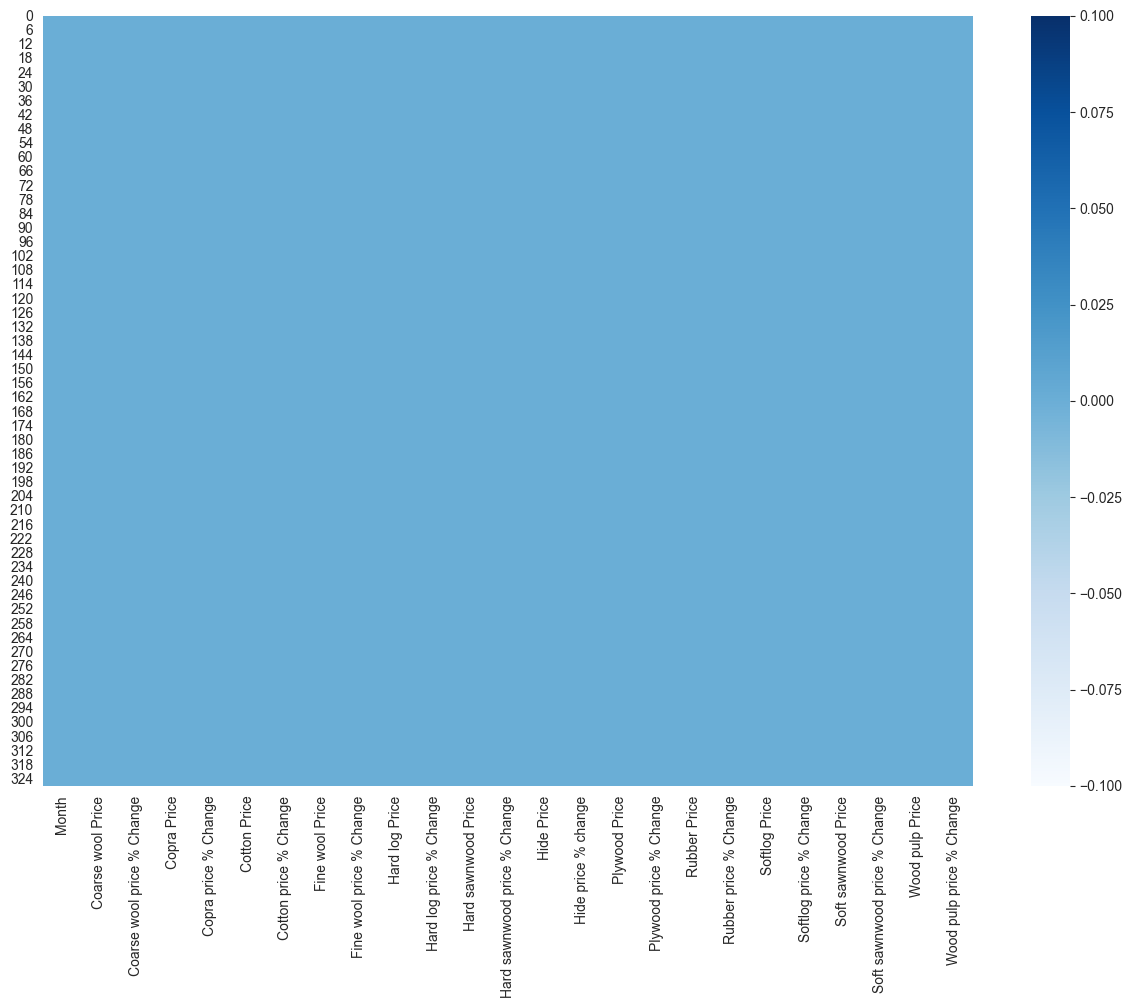

In [27]:
# Cambios en el dataset luego de limpieza
datasetOriginalClean.info()
totalRows = len(datasetOriginal)
totalRowsClean = len(datasetOriginalClean)
totalCleanPercentage = 100 - totalRowsClean / totalRows * 100
print("Diferencia de filas despues de la limpieza del dataset completo: ",  (totalRows - totalRowsClean))
print("Diferencia de filas en porcentaje despues de la limpieza del dataset completo: ",  totalCleanPercentage)
print("Revision grafica valores nulos")
pyplot.figure(figsize=(15,10))
sns.heatmap(datasetOriginalClean.isnull(), annot=False, cmap='Blues')
pyplot.show()

# Tras la limpieza del dataset se eliminaron 34 registros (≈9.4% del total) que contenían valores nulos o inconsistentes. El nuevo conjunto de datos conserva 327 filas con información completa y coherente, sin valores faltantes, lo cual permite continuar con el análisis de forma confiable.

In [28]:
# Eliminar filas con valores nulos en una columna especifica
datasetOriginalCleanColumns = datasetOriginal.drop(columns = ['Coarse wool Price'])
datasetOriginalCleanColumns = datasetOriginalCleanColumns.dropna(subset=['Fine wool price % Change'])
datasetOriginalCleanColumns.isnull().sum()

#Se eliminaron las filas que contenían valores nulos en la columna “Fine wool price % Change” y se excluyó la columna “Coarse wool Price”. El dataset resultante no presenta valores faltantes en ninguna variable, lo que garantiza una base de datos consistente y lista para el análisis posterior.

Month                           0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

Diferencia de filas despues de la limpieza del dataset completo:  34
Diferencia de filas en porcentaje despues de la limpieza del dataset completo:  9.418282548476455


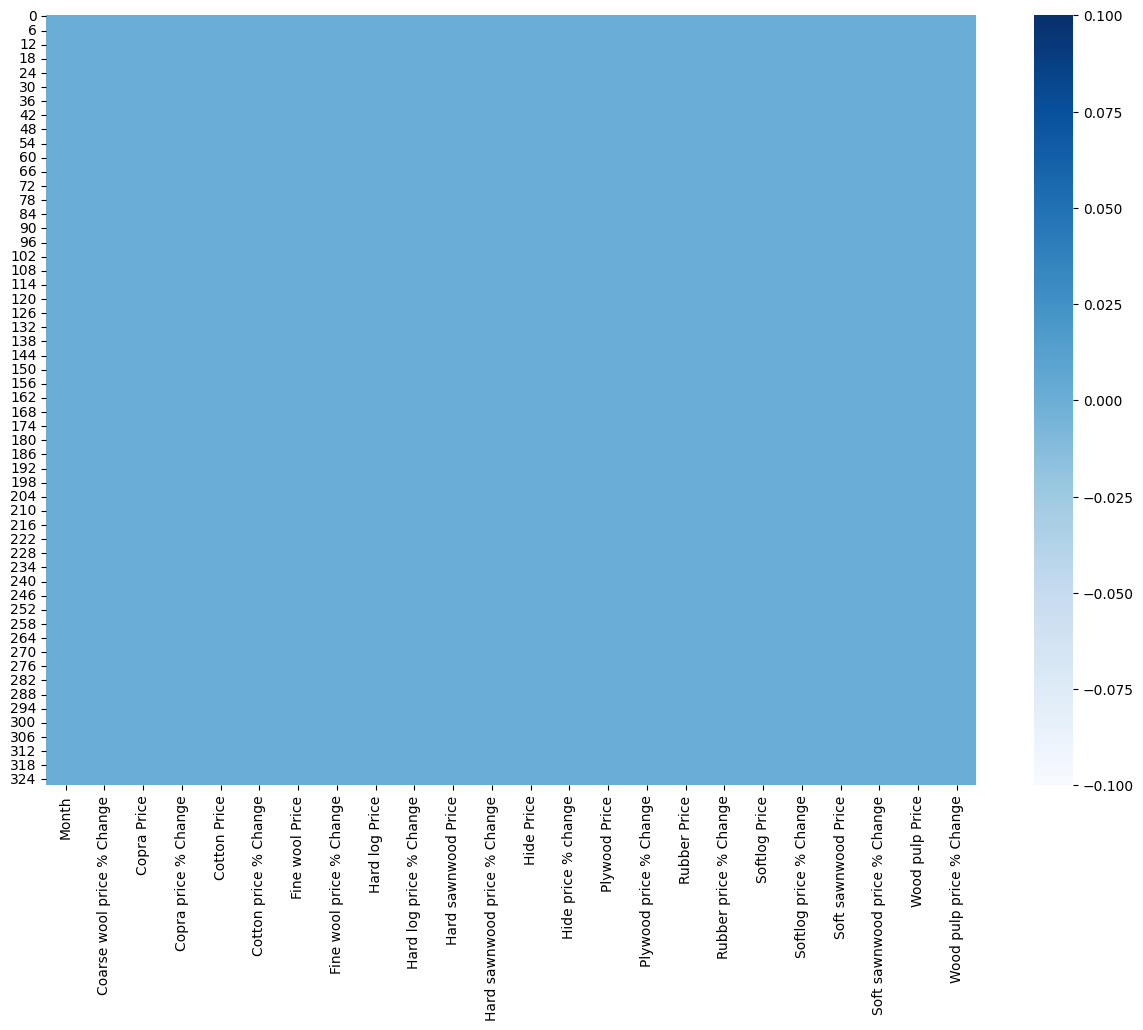

In [68]:
# Verificación final de limpieza:
totalRows = len(datasetOriginal)
totalRowsClean = len(datasetOriginalCleanColumns)
totalCleanPercentage = 100 - totalRowsClean / totalRows * 100
print("Diferencia de filas despues de la limpieza del dataset completo: ", (totalRows - totalRowsClean))
print("Diferencia de filas en porcentaje despues de la limpieza del dataset completo: ", totalCleanPercentage)

pyplot.figure(figsize=(15, 10))
sns.heatmap(datasetOriginalCleanColumns.isnull(), annot=False, cmap='Blues')
pyplot.show()

# Luego del proceso de limpieza se eliminaron 34 registros, equivalentes al 9.42% del total, debido a la presencia de valores nulos en algunas variables. El dataset final no contiene valores faltantes, garantizando así la consistencia y calidad de los datos para los análisis posteriores.

In [69]:
# Limpieza condicional por columnas:
for col in datasetOriginalCleanColumns.columns:
    null_rows = datasetOriginalCleanColumns[datasetOriginalCleanColumns[col].isna()]
    porcetageDelete = int(len(null_rows[col]) * 0.1)
    if porcetageDelete > 0:
        rowsDelete = null_rows.sample(n=porcetageDelete, random_state=50).index
        datasetOriginalCleanColumns.drop(index=rowsDelete, inplace=True)

datasetOriginalCleanColumns.isnull().sum()

#Tras aplicar una limpieza condicional por columnas, se eliminaron registros con valores nulos de manera controlada (hasta el 10% de los datos faltantes por columna). Como resultado, el dataset quedó completamente libre de valores nulos, garantizando una base de datos íntegra y lista para el análisis estadístico y la modelación.

Month                           0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64